<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Enfineering-CE784A-/blob/main/Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
% matplotlib inline

In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [37]:
Non_raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'
Raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Raveling'
test_data = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [38]:
Non_raveling_data

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'

In [160]:
list_nr = os.listdir(Non_raveling_data)
list_r = os.listdir(Raveling_data)
list_test = os.listdir(test_data)

In [161]:
list_test[0]

'2.jpg'

In [162]:
#list_r = (os.listdir(Raveling))

In [163]:
#list_r[:5]

In [164]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


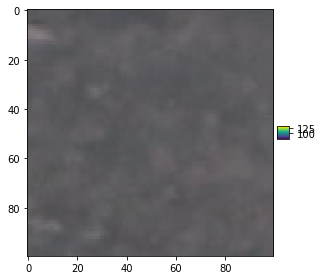

In [165]:
img_nr = []

for i in range(len(list_nr)):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  img_nr.append(np.array(img))
  io.imshow(img)


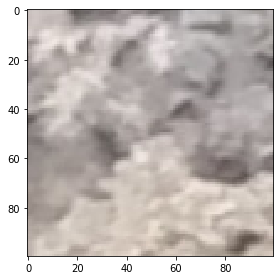

In [166]:
img_r = []

for i in range(len(list_r)):
  img = io.imread(os.path.join(Raveling_data,list_r[i]))
  img_r.append(np.array(img))
  io.imshow(img)

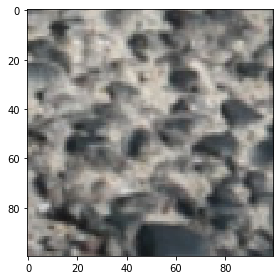

In [167]:
img_test = []

for i in range(len(list_test)):
  img = io.imread(os.path.join(test_data,list_test[i]))
  img_test.append(np.array(img))
  io.imshow(img)

In [168]:
print(len(img_nr))
print(len(img_r))
print(len(img_test))

351
349
300


In [169]:
img_nr = np.array(img_nr)
img_r = np.array(img_r)
img_test = np.array(img_test)

In [170]:
print(img_nr.shape)
print(img_r.shape)
print(img_test.shape)

(351, 100, 100, 3)
(349, 100, 100, 3)
(300, 100, 100, 3)


In [171]:
#def mean(arr[][]):


In [254]:
imgprop = []

imgprop_test = []


In [179]:
for i in range(len(img_nr)):
  
  imgprop.append(
      [np.mean(img_nr[i][:,:,0]), np.std(img_nr[i][:,:,0]), kurtosis((img_nr[i][:,:,0]).flatten()), skew((img_nr[i][:,:,0]).flatten()), 
       np.mean(img_nr[i][:,:,1]), np.std(img_nr[i][:,:,1]), kurtosis((img_nr[i][:,:,1]).flatten()), skew((img_nr[i][:,:,1]).flatten()),
       np.mean(img_nr[i][:,:,2]), np.std(img_nr[i][:,:,2]), kurtosis((img_nr[i][:,:,2]).flatten()), skew((img_nr[i][:,:,2]).flatten()),
       entropy((img_nr[i][:,:,0]).flatten()), entropy((img_nr[i][:,:,1]).flatten()), entropy((img_nr[i][:,:,2]).flatten())]
  )


for i in range(len(img_r)):
  
  imgprop.append(
      [np.mean(img_r[i][:,:,0]), np.std(img_r[i][:,:,0]), kurtosis((img_r[i][:,:,0]).flatten()), skew((img_r[i][:,:,0]).flatten()), 
       np.mean(img_r[i][:,:,1]), np.std(img_r[i][:,:,1]), kurtosis((img_r[i][:,:,1]).flatten()), skew((img_r[i][:,:,1]).flatten()),
       np.mean(img_r[i][:,:,2]), np.std(img_r[i][:,:,2]), kurtosis((img_r[i][:,:,2]).flatten()), skew((img_r[i][:,:,2]).flatten()),
       entropy((img_r[i][:,:,0]).flatten()), entropy((img_r[i][:,:,1]).flatten()), entropy((img_r[i][:,:,2]).flatten())]
  )





In [255]:
for i in range(len(img_test)):
  
  imgprop_test.append(
      [np.mean(img_test[i][:,:,0]), np.std(img_test[i][:,:,0]), kurtosis((img_test[i][:,:,0]).flatten()), skew((img_test[i][:,:,0]).flatten()), 
       np.mean(img_test[i][:,:,1]), np.std(img_test[i][:,:,1]), kurtosis((img_test[i][:,:,1]).flatten()), skew((img_test[i][:,:,1]).flatten()),
       np.mean(img_test[i][:,:,2]), np.std(img_test[i][:,:,2]), kurtosis((img_test[i][:,:,2]).flatten()), skew((img_test[i][:,:,2]).flatten()),
       entropy((img_test[i][:,:,0]).flatten()), entropy((img_test[i][:,:,1]).flatten()), entropy((img_test[i][:,:,2]).flatten())]
  )
  

In [256]:
len(imgprop_test)

300

In [181]:
imgprop = np.array(imgprop)

In [183]:
imgprop.shape

(700, 15)

In [184]:
# for i in range(len(img_r)):
#   imgprop_r[i][0] = np.mean(img_r[i][:,:,0])
#   imgprop_r[i][1] = np.std(img_r[i][:,:,0])
#   imgprop_r[i][2] = kurtosis((img_r[i][:,:,0]).flatten())
#   imgprop_r[i][3] = skew((img_r[i][:,:,0]).flatten())
#   imgprop_r[i][4] = np.mean(img_r[i][:,:,1])
#   imgprop_r[i][5] = np.std(img_r[i][:,:,1])
#   imgprop_r[i][6] = kurtosis((img_r[i][:,:,1]).flatten())
#   imgprop_r[i][7] = skew((img_r[i][:,:,1]).flatten())
#   imgprop_r[i][8] = np.mean(img_r[i][:,:,2])
#   imgprop_r[i][9] = np.std(img_r[i][:,:,2])
#   imgprop_r[i][10] = kurtosis((img_r[i][:,:,2]).flatten())
#   imgprop_r[i][11] = skew((img_r[i][:,:,2]).flatten())
#   imgprop_r[i][12] = entropy((img_r[i][:,:,0]).flatten())
#   imgprop_r[i][13] = entropy((img_r[i][:,:,1]).flatten())
#   imgprop_r[i][14] = entropy((img_r[i][:,:,2]).flatten())

In [186]:
print(imgprop)

[[ 1.38337900e+02  2.84643448e+01  9.43863116e-02 ...  9.18858074e+00
   9.19034281e+00  9.19242996e+00]
 [ 1.18611600e+02  2.32703018e+01  1.02089073e+00 ...  9.18943146e+00
   9.19384166e+00  9.19563871e+00]
 [ 7.54408000e+01  1.50918884e+01  2.09268515e+00 ...  9.19065347e+00
   9.19593358e+00  9.19959092e+00]
 ...
 [ 1.19122000e+02  3.68910682e+01  1.52116804e-01 ...  9.16104581e+00
   9.15946492e+00  9.16230873e+00]
 [ 1.49974000e+02  3.36586649e+01 -7.37567366e-01 ...  9.18462085e+00
   9.19120574e+00  9.19531866e+00]
 [ 1.80892800e+02  2.84121437e+01 -2.97238148e-01 ...  9.19759906e+00
   9.19681359e+00  9.19741479e+00]]


In [59]:
print(imgprop_test)

[[124.9043, 45.58866680996495, -0.919347511432759, -0.08668077495600902, 124.0693, 42.829154760630054, -0.9123556300208255, -0.0763804150515785, 120.9571, 39.66162956296677, -0.8752134916474739, -0.08522591829456029, 9.13912355522308, 9.147177859797333, 9.1535622804405, 0, 0, 0, 0], [124.9043, 45.58866680996495, -0.919347511432759, -0.08668077495600902, 124.0693, 42.829154760630054, -0.9123556300208255, -0.0763804150515785, 120.9571, 39.66162956296677, -0.8752134916474739, -0.08522591829456029, 9.13912355522308, 9.147177859797333, 9.1535622804405, 0, 0, 0, 0], [124.9043, 45.58866680996495, -0.919347511432759, -0.08668077495600902, 124.0693, 42.829154760630054, -0.9123556300208255, -0.0763804150515785, 120.9571, 39.66162956296677, -0.8752134916474739, -0.08522591829456029, 9.13912355522308, 9.147177859797333, 9.1535622804405, 0, 0, 0, 0], [124.9043, 45.58866680996495, -0.919347511432759, -0.08668077495600902, 124.0693, 42.829154760630054, -0.9123556300208255, -0.0763804150515785, 120.95

In [203]:
y_nr = np.zeros(351)
y_r = np.ones(349)

y = np.concatenate((y_nr, y_r), axis = 0)
print(y.shape)

(700,)


In [70]:
df = pd.DataFrame(imgprop, columns = ['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g','mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b','range_r', 'range_g', 'range_b', 'output'])

In [143]:
df.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,kur_b,skew_b,entropy_r,entropy_g,entropy_b,range_r,range_g,range_b,output
0,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
1,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
2,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
3,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
4,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0


In [72]:
df_test = pd.DataFrame(imgprop_test, columns = ['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g','mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b','range_r', 'range_g', 'range_b', 'output'])

In [73]:
df_test.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,kur_b,skew_b,entropy_r,entropy_g,entropy_b,range_r,range_g,range_b,output
0,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562,0,0,0,0
1,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562,0,0,0,0
2,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562,0,0,0,0
3,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562,0,0,0,0
4,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562,0,0,0,0


In [74]:
X_pred = df_test[['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g','mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b']]

In [75]:
X_pred.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,kur_b,skew_b,entropy_r,entropy_g,entropy_b
0,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562
1,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562
2,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562
3,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562
4,124.9043,45.588667,-0.919348,-0.086681,124.0693,42.829155,-0.912356,-0.07638,120.9571,39.66163,-0.875213,-0.085226,9.139124,9.147178,9.153562


In [257]:
X_pred = np.array(imgprop_test)

In [258]:
len(imgprop_test)

300

In [259]:
X_pred

array([[ 1.22803000e+02,  4.40175555e+01, -1.02285405e-01, ...,
         9.14506030e+00,  9.13944678e+00,  9.13730015e+00],
       [ 1.40251700e+02,  3.40239525e+01, -9.09163116e-01, ...,
         9.17972271e+00,  9.18450009e+00,  9.18680675e+00],
       [ 1.19094800e+02,  2.86761611e+01,  6.30627138e-01, ...,
         9.18259893e+00,  9.17959417e+00,  9.18106373e+00],
       ...,
       [ 1.15458700e+02,  3.72116177e+01, -1.19692485e+00, ...,
         9.15708730e+00,  9.17015979e+00,  9.17847898e+00],
       [ 2.00243900e+02,  2.65784351e+01,  8.28827027e-01, ...,
         9.20108939e+00,  9.19922634e+00,  9.19763043e+00],
       [ 1.24904300e+02,  4.55886668e+01, -9.19347511e-01, ...,
         9.13912356e+00,  9.14717786e+00,  9.15356228e+00]])

In [260]:
# X = df[['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g','mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b']]
# X = np.array(X)

In [261]:
X = imgprop

In [262]:
#len(df['kur_r'][0])
perms = np.random.permutation(700)

In [206]:
# y = df['output']
y = np.array(y)

In [207]:
X = X[perms]
y = y[perms]

In [208]:
y = tf.keras.utils.to_categorical(y)

In [209]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [345]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [346]:
input_shape = [X_train.shape[1]]

In [381]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(2, activation = 'sigmoid'),
])

In [382]:
opt = keras.optimizers.Adam(learning_rate=0.001)

loss_fn = keras.losses.BinaryCrossentropy()
model.compile(
    optimizer=opt,
    loss=loss_fn,
    metrics=['accuracy']
)

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7599 - val_loss: 0.5129 - val_accuracy: 0.8214
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7540 - val_loss: 0.5096 - val_accuracy: 0.8036
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7758 - val_loss: 0.5051 - val_accuracy: 0.8036
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7599 - val_loss: 0.5088 - val_accuracy: 0.7679
Epoch 5/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.7579 - val_loss: 0.5089 - val_accuracy: 0.7679
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.7738 - val_loss: 0.5122 - val_accuracy: 0.7321
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.7520 - val_loss: 0.5186 - val_accuracy: 0.7321
Epoch 8/500
3

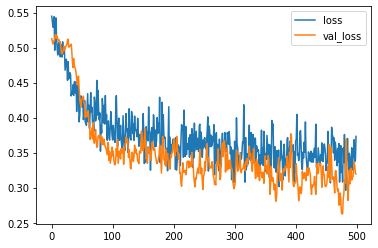

In [384]:
epochs = 500
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=16,  
    epochs=epochs,
    verbose=1,
    #validation_data=(X_test, y_test)
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [385]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)
print('test accuracy:', acc)

1/1 - 0s - loss: 0.2785 - accuracy: 0.9143 - 20ms/epoch - 20ms/step
test accuracy: 0.9142857193946838


In [386]:
y_pred = model.predict(X_pred)
y_output = []

In [387]:
X_pred.shape

(300, 15)

In [388]:
len(y_pred)

300

In [389]:
for i in range(len(y_pred)):
  if(y_pred[i][0] > y_pred[i][1]):
    y_output.append("Non_raveling")
  else:
    y_output.append("Raveling")

In [390]:
y_output[:10]

['Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling']

In [391]:
len(list_test)
len(y_output)

300

In [392]:
op_data = {'filename': list_test, 'class': y_output}

In [393]:
df_op = pd.DataFrame(op_data)
df_op

,filename,class
0,2.jpg,Raveling
1,3.jpg,Raveling
2,1.jpg,Non_raveling
3,198.jpg,Raveling
4,174.jpg,Raveling
...,...,...
295,20.jpg,Non_raveling
296,228.jpg,Raveling
297,74.jpg,Raveling
298,197.jpg,Raveling


In [394]:
df_op.to_csv("OutputM.csv", index = False)
!cp OutputM.csv "drive/My Drive/"